<a href="https://colab.research.google.com/github/Hadraks/disaster_tweets/blob/main/disaster_tweets_word2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is to focus on the uses of word 2 vec.

In [ ]:
!pip install adjustText
!pip install yellowbrick


  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=d9962ced0a948e619b61b3b67f961302ea199a070adda4394bdeb6b3a6ddd349
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Unmount the drive at the end of the session

#drive.flush_and_unmount()
#print('All changes made in this colab session should now be visible in Drive.')

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import plotly.express as px

import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

import pandas as pd
import nltk
import regex as re
import string
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Only looking at training data for this analysis.

In [ ]:
#test = pd.read_csv("test.csv")
tr = pd.read_csv("train.csv")

In [ ]:
keywords = tr['keyword']

In [ ]:
keywords.fillna("None", inplace = True)

In [ ]:
#article_titles = tr['text']

Preprocessing for NLP.

In [ ]:
# Create a list of strings, where each string is an article title
titles_list = [title for title in keywords]

# Collapse the list of strings into a single long string for processing
big_title_string = ' '.join(titles_list)

from nltk.tokenize import word_tokenize

# Tokenize the string into words
tokens = word_tokenize(big_title_string)

# Remove non-alphabetic tokens, such as punctuation
words = [word.lower() for word in tokens if word.isalpha()]

# Filter out stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

words = [word for word in words if not word in stop_words]

# Print first 10 words
words[100:130]

['accident',
 'accident',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock',
 'aftershock']

Downloading the words from word vectors from google news.

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", binary = True) 


In [ ]:
# Check dimension of word vectors
model.vector_size
#each word has 300 vectors.

300

In [ ]:
economy_vec = model['accident']
economy_vec[:20] # First 20 components

array([ 0.11376953, -0.09570312,  0.08691406, -0.375     , -0.04345703,
        0.00418091,  0.07226562, -0.40625   ,  0.18359375,  0.08886719,
        0.14355469, -0.04394531, -0.19824219, -0.234375  , -0.17675781,
        0.12988281, -0.08349609,  0.15917969,  0.44921875, -0.1796875 ],
      dtype=float32)

In [ ]:
# Filter the list of vectors to include only those that Word2Vec has a vector for
vector_list = [model[word] for word in words if word in model.vocab]

# Create a list of the words corresponding to these vectors
words_filtered = [word for word in words if word in model.vocab]

# Zip the words together with their vector representations
word_vec_zip = zip(words_filtered, vector_list)

# Cast to a dict so we can turn it into a dataframe
word_vec_dict = dict(word_vec_zip)
df = pd.DataFrame.from_dict(word_vec_dict, orient='index')
df.shape

(208, 300)

Originally there were 220 keywords. I think some were duplicates and that is why it is 208 here.

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE was applied and I want to visualize it so I am only doing the top 2 components.

In [ ]:
tsne_df.shape

(208, 2)

In [ ]:
ind = list(df.index)

In [ ]:
tsne_index_df = pd.DataFrame(data = tsne_df, index =ind)

In [ ]:
tsne_df.shape

(208, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


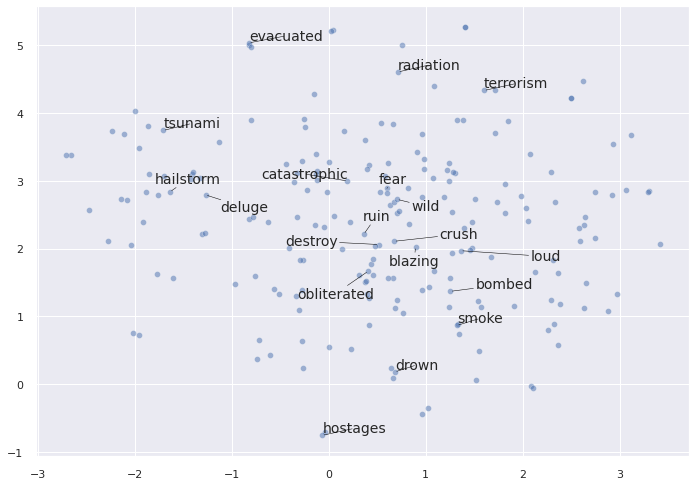

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(20, 208, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [ ]:
tsne_index_df

,0,1
none,0.706281,2.529178
ablaze,1.330856,0.892686
accident,2.313478,1.833465
aftershock,-2.003834,4.022930
airplane,1.235383,3.263118
...,...,...
wounded,2.745104,2.156568
wounds,2.644991,2.465302
wreck,2.126297,1.661147
wreckage,-0.608191,0.439415


Kmeans clustering will be applied the vectorized keywords to see what relationships appear.

In [ ]:
tsne_kmeans = tsne_index_df[[0,1]]
tsne_kmeans

,0,1
none,0.706281,2.529178
ablaze,1.330856,0.892686
accident,2.313478,1.833465
aftershock,-2.003834,4.022930
airplane,1.235383,3.263118
...,...,...
wounded,2.745104,2.156568
wounds,2.644991,2.465302
wreck,2.126297,1.661147
wreckage,-0.608191,0.439415


Silhouette analysis had been conducted and it was found that 4 clusters is by far the best fit for the data.

In [ ]:
kmodel = KMeans(n_clusters = 4, random_state=1)
kmodel.fit(tsne_index_df)
tsne_index_df['Label'] = kmodel.labels_


#cluster_assignments = kmodel.predict(tsne_index_df) 

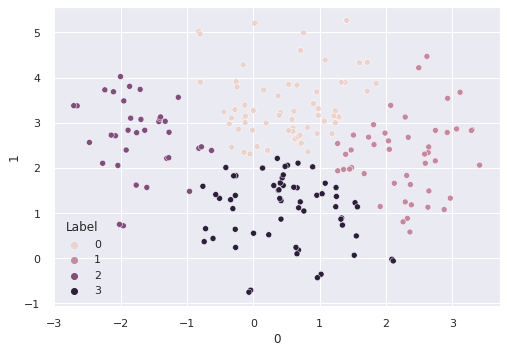

In [ ]:
sns.scatterplot(x=0, y = 1, data = tsne_index_df, hue='Label')


In [ ]:
tsne_index_df["Disaster"] = tsne_index_df.index
tsne_index_df

,0,1,Label,Disaster
none,0.706281,2.529178,0,none
ablaze,1.330856,0.892686,3,ablaze
accident,2.313478,1.833465,1,accident
aftershock,-2.003834,4.022930,2,aftershock
airplane,1.235383,3.263118,0,airplane
...,...,...,...,...
wounded,2.745104,2.156568,1,wounded
wounds,2.644991,2.465302,1,wounds
wreck,2.126297,1.661147,1,wreck
wreckage,-0.608191,0.439415,3,wreckage


In [ ]:
fig = px.scatter(tsne_index_df, x=0, y=1,
                 color="Label", 
                 hover_data=["Disaster"])
fig.show()

Looking through the plot it looks like the general categories are: red = natural disasters, blue = global disasters (e.g. armageddon), yellow = home and personal issues (electrocuted, hostages), and purple = personal disasters (injury).
This is interesting and I like the graphic but not sure what can be done with the results.

In [ ]:
tsne_index_df.index

Index(['none', 'ablaze', 'accident', 'aftershock', 'airplane', 'ambulance',
       'annihilated', 'annihilation', 'apocalypse', 'armageddon',
       ...
       'weapons', 'whirlwind', 'wild', 'wildfire', 'windstorm', 'wounded',
       'wounds', 'wreck', 'wreckage', 'wrecked'],
      dtype='object', length=208)

AttributeError: ignored

TypeError: ignored

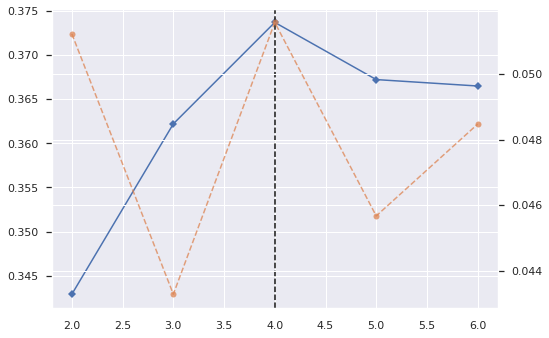

In [ ]:
visualizer = KElbowVisualizer(KMeans(), k=(2,7), metric = "silhouette", timings = True)
visualizer.fit(tsne_kmeans)

Silhouette analysis showing that 4 clusters is best. Not sure what the error message is regarding but the silhouette analysis works. It was moved lower in the notebook because the error stopped the run through of the cells. 

In [ ]:
kmodel.labels_

array([0, 3, 1, 2, 0, 1, 3, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 3, 3, 1,
       3, 0, 2, 1, 0, 3, 1, 1, 3, 1, 3, 3, 3, 3, 0, 1, 1, 0, 0, 0, 3, 0,
       3, 1, 1, 1, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 1, 3, 2, 2, 3, 3, 3, 3,
       3, 1, 0, 0, 3, 3, 0, 1, 1, 3, 0, 0, 3, 2, 3, 3, 3, 3, 2, 3, 3, 0,
       3, 0, 0, 0, 3, 3, 1, 1, 0, 1, 1, 1, 0, 3, 0, 3, 3, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0,
       1, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 2,
       3, 3, 3, 0, 0, 3, 3, 2, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 1, 0, 1,
       3, 3, 3, 3, 0, 0, 0, 2, 2, 2, 0, 3, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 3, 2, 1, 1, 1, 3, 3], dtype=int32)

In [ ]:
tsne_index_df['Label'] = kmodel.labels_


In [ ]:
tsne_index_df

,0,1,Label,Disaster
none,0.706281,2.529178,0,none
ablaze,1.330856,0.892686,3,ablaze
accident,2.313478,1.833465,1,accident
aftershock,-2.003834,4.022930,2,aftershock
airplane,1.235383,3.263118,0,airplane
...,...,...,...,...
wounded,2.745104,2.156568,1,wounded
wounds,2.644991,2.465302,1,wounds
wreck,2.126297,1.661147,1,wreck
wreckage,-0.608191,0.439415,3,wreckage


In [ ]:
#word2vec.most_similar(positive=['woman', 'king'], negative=['man'])

In [ ]:
keyword_group = tr.groupby(['keyword'])
keyword_group

keyword_group[["target"]].agg([np.mean]).sort_values

keyword_group[["target"]].agg([np.mean])["target"].sort_values("mean", ascending = True).head(30)

keyword_group[["target"]].agg([np.mean])["target"].sort_values("mean", ascending = False).head(30)

disaster_df = keyword_group[["target"]].agg([np.mean])["target"]

In [ ]:
disaster_df

,mean
keyword,
None,0.688525
ablaze,0.361111
accident,0.685714
aftershock,0.000000
airplane%20accident,0.857143
...,...
wounded,0.702703
wounds,0.303030
wreck,0.189189


In [ ]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in model.vocab]
    return np.mean(model[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.vocab for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes
    a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [ ]:
# Preprocess the corpus
corpus = [preprocess(title) for title in titles_list]

# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: has_vector_representation(model, doc))

# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))

47 docs removed
0 docs removed


In [ ]:
# Initialize an array for the size of the corpus
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(model, doc))
    
X = np.array(x) # list to array

In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:900])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(X[:900])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



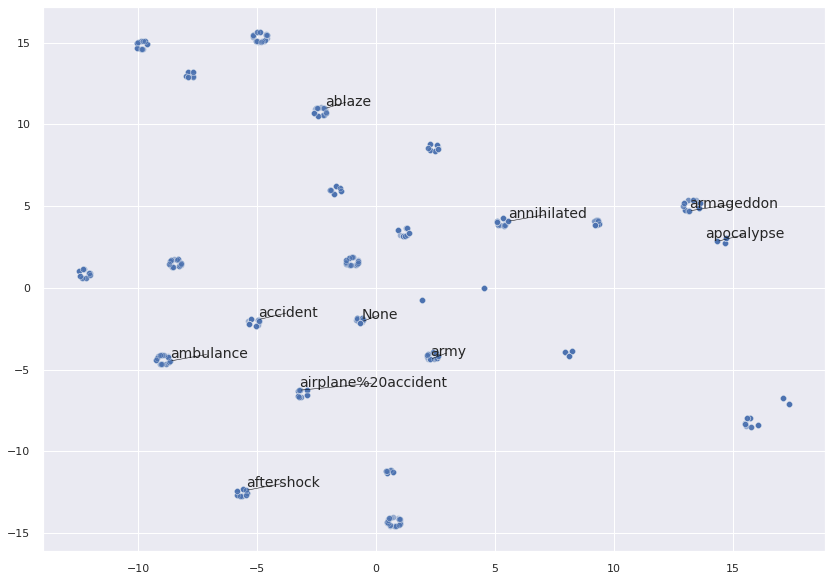

In [ ]:
fig, ax = plt.subplots(figsize = (14, 10))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Second plot: Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
titles_to_plot = list(np.arange(0, 400, 40)) # plots every 40th title in first 400 titles

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [ ]:
model.most_similar("fire", topn=20)

[('blaze', 0.7516718506813049),
 ('fires', 0.7222490310668945),
 ('Fire', 0.69910728931427),
 ('flames', 0.6387674808502197),
 ('carelessly_discarded_cigarette', 0.6215550899505615),
 ('inferno', 0.6056278347969055),
 ('firefighters', 0.6039329767227173),
 ('alarm_blaze', 0.5841655731201172),
 ('brush_fires', 0.579571008682251),
 ('grassfire', 0.5759598612785339),
 ('blazes', 0.5724145174026489),
 ('Trabing_Fire', 0.5723351240158081),
 ('brushfire', 0.5706649422645569),
 ('wildfire', 0.5685724020004272),
 ('Unattended_candle', 0.5644780993461609),
 ('wildland_fire', 0.5628588199615479),
 ('Oily_rags', 0.5610144734382629),
 ('ignited_combustibles', 0.5588265657424927),
 ('Firefighters_douse', 0.5582048892974854),
 ('nearby_combustibles', 0.5580720901489258)]

In [ ]:
model.most_similar("aftershock", topn=20)

[('temblor', 0.7776625752449036),
 ('tremor', 0.7703367471694946),
 ('aftershocks', 0.764899492263794),
 ('quake', 0.7573075294494629),
 ('#.#_magnitude_aftershock', 0.7549519538879395),
 ('#.#_magnitude_quake', 0.7472286224365234),
 ('#.#_magnitude_earthquake', 0.7448389530181885),
 ('aftershock_measuring', 0.7348997592926025),
 ('earthquake', 0.733711838722229),
 ('#.#_magnitude_tremor', 0.7100733518600464),
 ('tremor_measuring', 0.6975036859512329),
 ('earthquake_measuring', 0.687408447265625),
 ('quakes', 0.6839088201522827),
 ('aftershock_shook', 0.677603542804718),
 ('tremblor', 0.671722948551178),
 ('tremor_shook', 0.6716153025627136),
 ('aftershock_jolted', 0.6707204580307007),
 ('quake_jolted', 0.6688965559005737),
 ('aftershock_rocked', 0.6662856340408325),
 ('earthquake_jolted', 0.6634569764137268)]

The most_similar above is to see what other words you could look for to find a disaster. The business proposal would be that when a disaster occurs the twitter can be looked at with a broader search parameters to find anything that might be related to that disaster.